<a href="https://colab.research.google.com/github/jan3011/Prediction-of-Parkinson-disease/blob/master/SVM_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted value [1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 0]
Actual value [1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


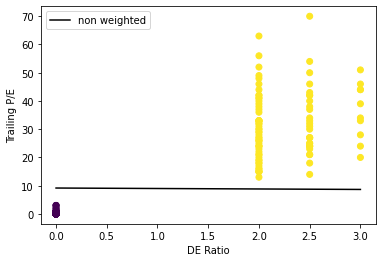

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

d=files.upload() #upload csv to google colab , once done then give cancel upload
df=pd.read_csv('demographics.csv')
df.head()
#replacing nan with the median value of the feature by grouping by target value
df['HoehnYahr'].fillna(df.groupby('Target')['HoehnYahr'].transform("median"),inplace=True)
df['U1RS'].fillna(df.groupby('Target')['U1RS'].transform("median"),inplace=True)
df['Speed_10'].fillna(df.groupby('Target')['Speed_10'].transform("median"),inplace=True)
df['U1RSM'].fillna(df.groupby('Target')['U1RSM'].transform("median"),inplace=True)
df['TUAG'].fillna(df.groupby('Target')['TUAG'].transform("median"),inplace=True)
df['Height (meters)'].fillna(df.groupby('Target')['Height (meters)'].transform("median"),inplace=True)
df['Weight (kg)'].fillna(df.groupby('Target')['Weight (kg)'].transform("median"),inplace=True)
df['Speed_01 (m/sec)'].fillna(df.groupby('Target')['Speed_01 (m/sec)'].transform("median"),inplace=True)
X=df.iloc[:,4:14]
a=np.array(X)
y=a[:,9]
Y=y.astype('int')
X=np.column_stack((df.HoehnYahr,df.U1RS))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=1) 
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Predicted value",y_pred)
print("Actual value",y_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
y = (df["Target"].replace("underperform",0).replace("outperform",1).values.tolist())
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx,yy, "k-", label="non weighted")
plt.scatter(X[:, 0],X[:, 1],c=y)
plt.ylabel("Trailing P/E")
plt.xlabel("DE Ratio")
plt.legend()

plt.show()

# New Section